<a href="https://colab.research.google.com/github/pavel195/Py_university-/blob/main/model_quality_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [5]:
data_reg = pd.read_excel('ПЗ.Метрики_Чипкинеев_Павел.xlsx', sheet_name='Regression')
df_reg = data_reg.copy()
data_class = pd.read_excel('ПЗ.Метрики_Чипкинеев_Павел.xlsx', sheet_name='Binary Classification')
df_class = data_class.copy()
df_reg


,model,part,Y_true,Y_pred
0,Polynominal Reg,train,904,899
1,LinReg,train,1590,1584
2,Polynominal Reg,test,1018,1005
3,Polynominal Reg,test,1334,1342
4,Polynominal Reg,train,1153,1155
...,...,...,...,...
5195,LinReg,train,1959,1979
5196,LinReg,test,1292,1273
5197,LinReg,train,1815,1852
5198,LinReg,train,1979,1966


In [6]:
df_class
#датафрейм с классификацией

,model,part,Y_true,Y_pred_proba_1,Y_pred_proba_0,Y_pred
0,GradientBoosting,test,1,0.34,0.66,0
1,DecisionTree,train,1,0.14,0.86,0
2,GradientBoosting,train,0,0.09,0.91,0
3,GradientBoosting,test,1,0.13,0.87,0
4,DecisionTree,test,1,0.08,0.92,0
...,...,...,...,...,...,...
5195,DecisionTree,test,1,0.52,0.48,1
5196,GradientBoosting,test,0,0.65,0.35,1
5197,DecisionTree,train,1,0.81,0.19,1
5198,DecisionTree,train,0,0.79,0.21,1


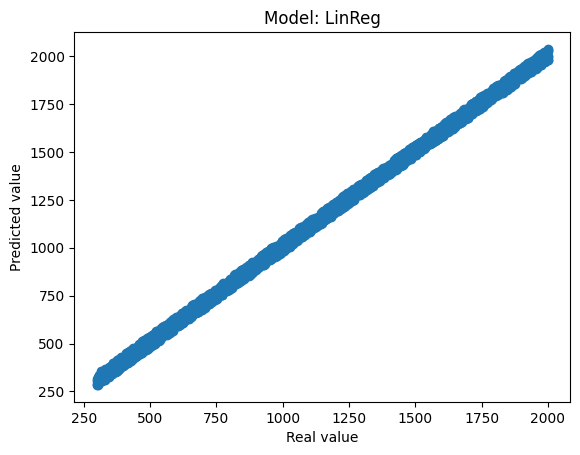

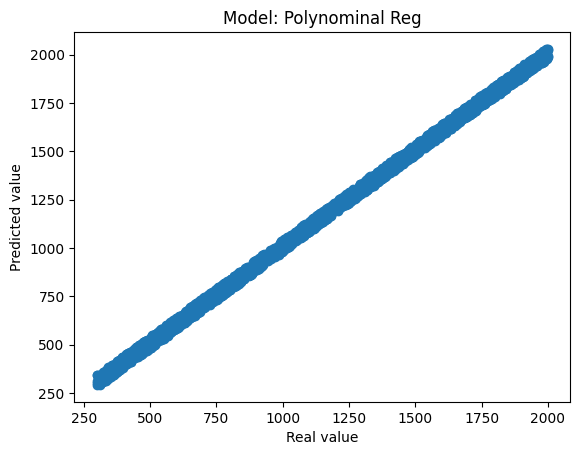

In [7]:
for model, sample in df_reg.groupby('model'):
    plt.scatter(sample['Y_true'], sample['Y_pred'])
    plt.title(f"Model: {model}")
    plt.xlabel('Real value')
    plt.ylabel('Predicted value')
    plt.show()
    #построил два графика для оценки точности предсказанных значений от правдивых, линия под 45 градусов почти идеальна, значит точность очень близка к 1

In [8]:
for model, sample in df_reg.groupby(['model']):
    y_true = sample['Y_true']
    y_pred = sample['Y_pred']

    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    print(model)
    print('mae - ' ,mae)
    print('mse - ' ,mse)
    print('rmse - ' ,rmse)
    print('r2 - ' ,r2)
    print()
#Посмотрел оценки и понял, что на моих данных лучше работает линейная регрессия, так как все оценки у нее лучше чем у полиноминалольной.

LinReg
mae -  16.955882352941178
mse -  412.76033386327504
rmse -  20.316503977389296
r2 -  0.9982683078943331

Polynominal Reg
mae -  16.764157973174367
mse -  402.5175111773472
rmse -  20.0628390607448
r2 -  0.9983606262484681



<ipython-input-8-0290f38aaa29>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for model, sample in df_reg.groupby(['model']):


In [ ]:
results = []

# Получил уникальные имена моделей и выборок
unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

# ВЫчислил метрики
for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        y_true = subset['Y_true']
        y_pred = subset['Y_pred']

        confusion = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        results.append({'model': model, 'part': part, 'confusion': confusion, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

# ВывеЛ результаты
for result in results:
    print(f"Model: {result['model']}, Part: {result['part']}")
    print("Confusion Matrix:")
    print(result['confusion'])
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"F1: {result['f1']:.2f}")
    print()

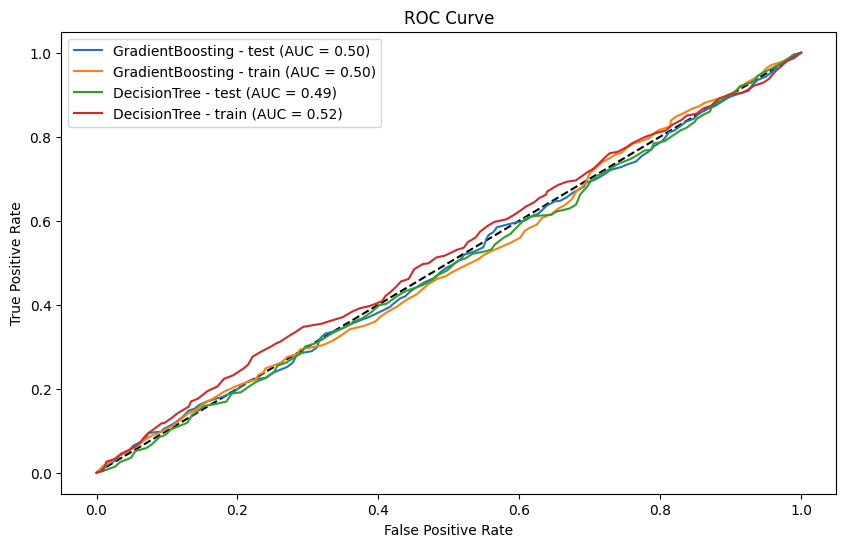

In [10]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')

unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        fpr, tpr, _ = roc_curve(subset['Y_true'], subset['Y_pred_proba_1'])
        roc_auc = auc(fpr, tpr)

        label = f'{model} - {part} (AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()
#Здесь построил 4 рок кривые, добавил линию под 45 градусов(пунктирная)

In [ ]:
#Сравнивая модели, можно сказать, что градиентный бустинг на train значениях самый лучший